In [85]:
import datetime
import random
import json
import numpy as np 
#import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
""" class FakeHeartRateMonitor():
    def __init__(self):
        self.prev_hr = 60
        self.time_now = datetime.datetime.now()

    def get_heart_rate(self):
        change = random.randint(-2, 2)
        if random.random() < 0.1:  
            change += random.randint(-70, 70)

        new_rate = min(max(self.prev_hr + change, 40), 160)
        
        self.time_now = self.time_now + datetime.timedelta(seconds=1)
        return [new_rate, datetime.datetime.timestamp(self.time_now)]
    
monitor = FakeHeartRateMonitor() """


In [97]:
with open('HeatSense_data.json', 'r') as openfile:
    data = json.load(openfile)
    
print(data['stores'][0]['values'])

hrs = data['stores'][0]['values']



[{'timestamp': 1705515569696, 'hr': 159}, {'timestamp': 1705515571104, 'temp': 21.9}, {'timestamp': 1705515571435, 'hr': 144}, {'timestamp': 1705515572025, 'hr': 138}, {'timestamp': 1705515572646, 'hr': 133}, {'timestamp': 1705515572988, 'temp': 22.0}, {'timestamp': 1705515573232, 'hr': 100}, {'timestamp': 1705515573816, 'hr': 100}, {'timestamp': 1705515574415, 'hr': 101}, {'timestamp': 1705515574996, 'temp': 22.0}, {'timestamp': 1705515575044, 'hr': 99}, {'timestamp': 1705515575632, 'hr': 99}, {'timestamp': 1705515576218, 'hr': 100}, {'timestamp': 1705515576849, 'hr': 100}, {'timestamp': 1705515576987, 'temp': 22.0}, {'timestamp': 1705515577481, 'hr': 99}, {'timestamp': 1705515578115, 'hr': 99}, {'timestamp': 1705515578801, 'hr': 98}, {'timestamp': 1705515578994, 'temp': 22.0}, {'timestamp': 1705515579434, 'hr': 96}, {'timestamp': 1705515580068, 'hr': 96}, {'timestamp': 1705515580701, 'hr': 95}, {'timestamp': 1705515580996, 'temp': 22.1}, {'timestamp': 1705515581384, 'hr': 95}, {'time

In [98]:
heartlist = []
templist = []

for l in hrs:
    if 'temp' in l.keys():
        templist.append(l)
    elif 'hr' in l.keys():
        heartlist.append(l)
    


In [88]:
heartlist

[{'timestamp': 1705515569696, 'hr': 159},
 {'timestamp': 1705515571435, 'hr': 144},
 {'timestamp': 1705515572025, 'hr': 138},
 {'timestamp': 1705515572646, 'hr': 133},
 {'timestamp': 1705515573232, 'hr': 100},
 {'timestamp': 1705515573816, 'hr': 100},
 {'timestamp': 1705515574415, 'hr': 101},
 {'timestamp': 1705515575044, 'hr': 99},
 {'timestamp': 1705515575632, 'hr': 99},
 {'timestamp': 1705515576218, 'hr': 100},
 {'timestamp': 1705515576849, 'hr': 100},
 {'timestamp': 1705515577481, 'hr': 99},
 {'timestamp': 1705515578115, 'hr': 99},
 {'timestamp': 1705515578801, 'hr': 98},
 {'timestamp': 1705515579434, 'hr': 96},
 {'timestamp': 1705515580068, 'hr': 96},
 {'timestamp': 1705515580701, 'hr': 95},
 {'timestamp': 1705515581384, 'hr': 95},
 {'timestamp': 1705515581966, 'hr': 96},
 {'timestamp': 1705515582801, 'hr': 96},
 {'timestamp': 1705515583088, 'hr': 96},
 {'timestamp': 1705515583677, 'hr': 96},
 {'timestamp': 1705515584257, 'hr': 98},
 {'timestamp': 1705515584847, 'hr': 99},
 {'time

In [105]:
hrs = templist

timstmps, heart_rates = np.expand_dims([x['timestamp'] for x in hrs], 1), np.expand_dims([x['temp'] for x in hrs], 1)

In [106]:
timstmps.shape

(4985, 1)

In [107]:
hours = 12
heart_rate_data = np.concatenate([heart_rates, timstmps], 1)


print(heart_rate_data.shape)
heart_rate_data

(4985, 2)


array([[2.19000000e+01, 1.70551557e+12],
       [2.20000000e+01, 1.70551557e+12],
       [2.20000000e+01, 1.70551557e+12],
       ...,
       [2.86000000e+01, 1.70552553e+12],
       [2.86000000e+01, 1.70552554e+12],
       [2.86000000e+01, 1.70552554e+12]])

In [93]:
window = 60 #seconds

average_data = []
for i in range(0, len(heart_rate_data) - window, window):
    window_data = heart_rate_data[i : i+window, :]
    avg_hr = np.mean(window_data[:, 0])
    average_data.append([round(avg_hr, 1), window_data[:, 1][0]])

heart_rate_data = average_data

heart_rate_data

[[22.5, 1705515571104.0],
 [23.9, 1705515691026.0],
 [25.0, 1705515810997.0],
 [25.9, 1705515931025.0],
 [26.5, 1705516051002.0],
 [27.0, 1705516171018.0],
 [27.5, 1705516291001.0],
 [27.8, 1705516411015.0],
 [28.2, 1705516530995.0],
 [28.5, 1705516651068.0],
 [28.5, 1705516771047.0],
 [28.8, 1705516891025.0],
 [29.0, 1705517010997.0],
 [28.7, 1705517131015.0],
 [29.7, 1705517250996.0],
 [30.8, 1705517371020.0],
 [31.6, 1705517490996.0],
 [32.3, 1705517611019.0],
 [32.8, 1705517730990.0],
 [32.7, 1705517851018.0],
 [32.5, 1705517970997.0],
 [32.6, 1705518091018.0],
 [32.8, 1705518210989.0],
 [33.0, 1705518331018.0],
 [33.2, 1705518450991.0],
 [33.5, 1705518571018.0],
 [33.9, 1705518690987.0],
 [33.8, 1705518811014.0],
 [32.4, 1705518931076.0],
 [31.0, 1705519051016.0],
 [30.1, 1705519170991.0],
 [29.6, 1705519291013.0],
 [29.2, 1705519411035.0],
 [28.9, 1705519531013.0],
 [28.5, 1705519650990.0],
 [28.2, 1705519771010.0],
 [28.0, 1705519890987.0],
 [27.8, 1705520011013.0],
 [27.7, 1705

## Line Plot

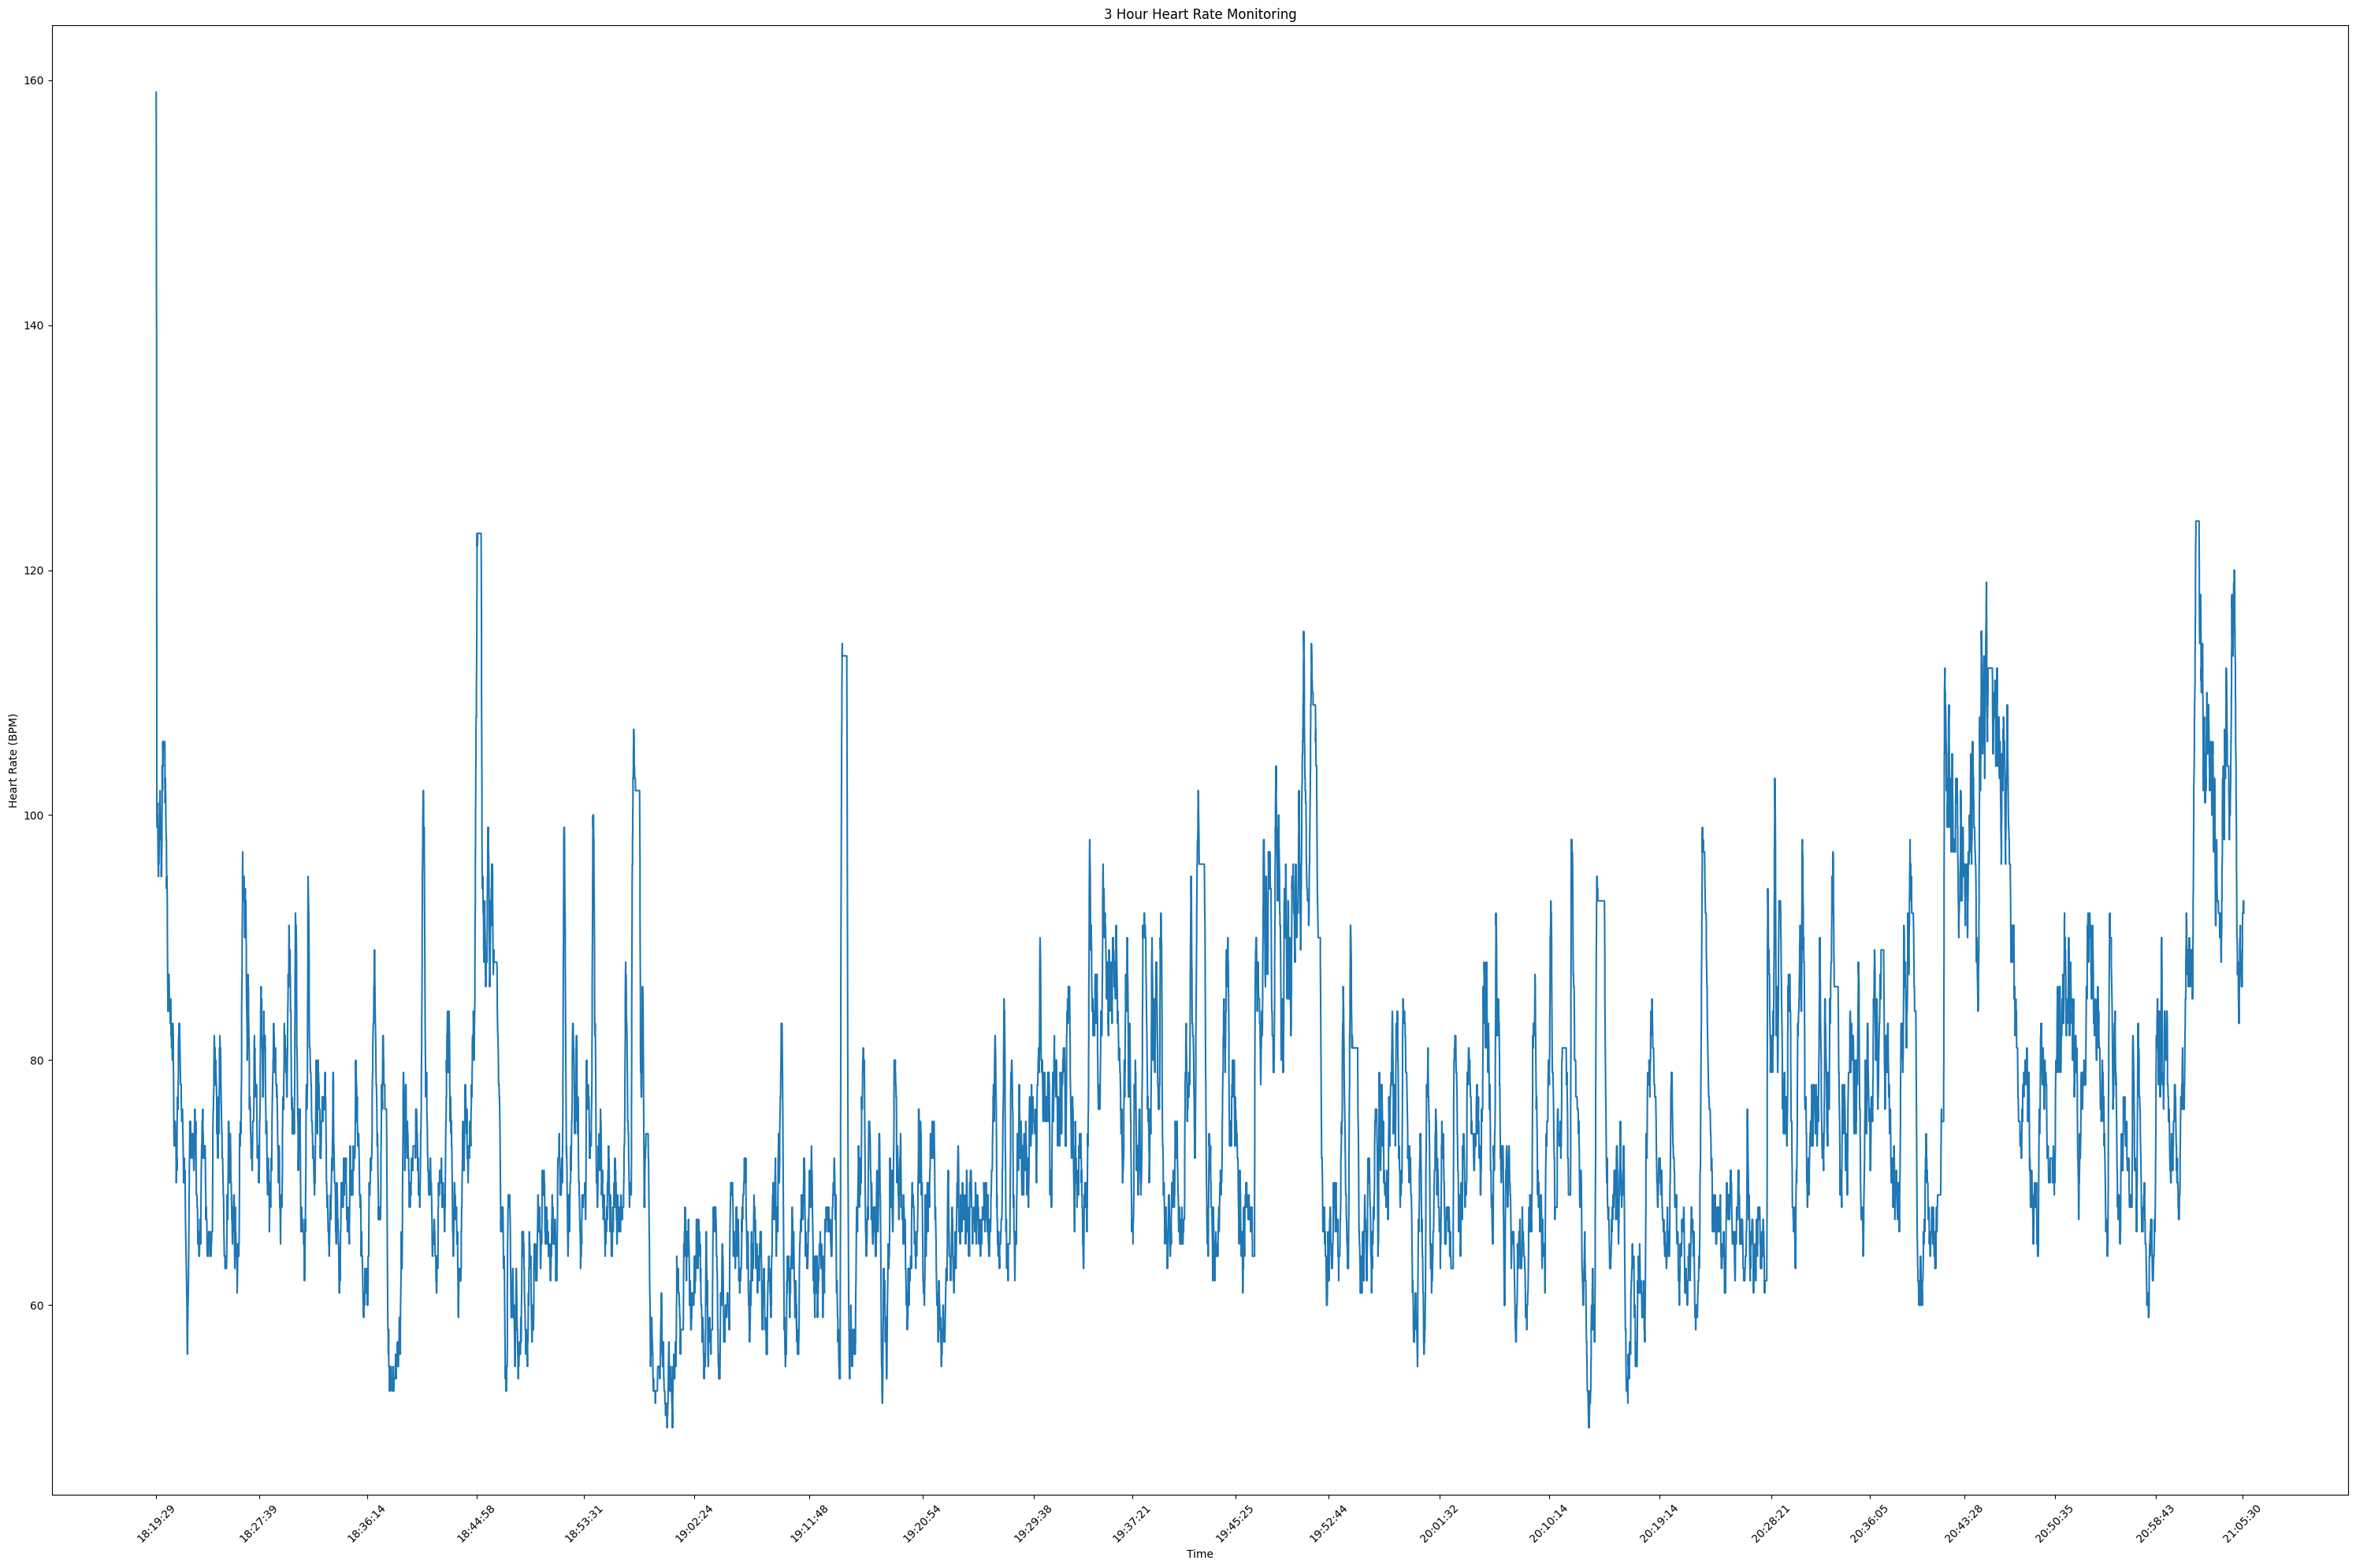

In [103]:
xaxis = [datetime.datetime.utcfromtimestamp(x/1000).strftime('%H:%M:%S') for x in np.array(heart_rate_data)[:,1]]
yaxis = np.array(heart_rate_data)[:,0]

plt.figure(figsize=(30, 20))
plt.plot(xaxis, yaxis) 
#sns.lineplot(y = yaxis, x = xaxis,markers=True)

plt.title('3 Hour Heart Rate Monitoring')
plt.xlabel('Time')
plt.ylabel('Heart Rate (BPM)')
plt.xticks(np.array(xaxis)[:: int(len(xaxis) / 20)])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
# plt.savefig('heart_rate_24hr.png')


## Radial Plot

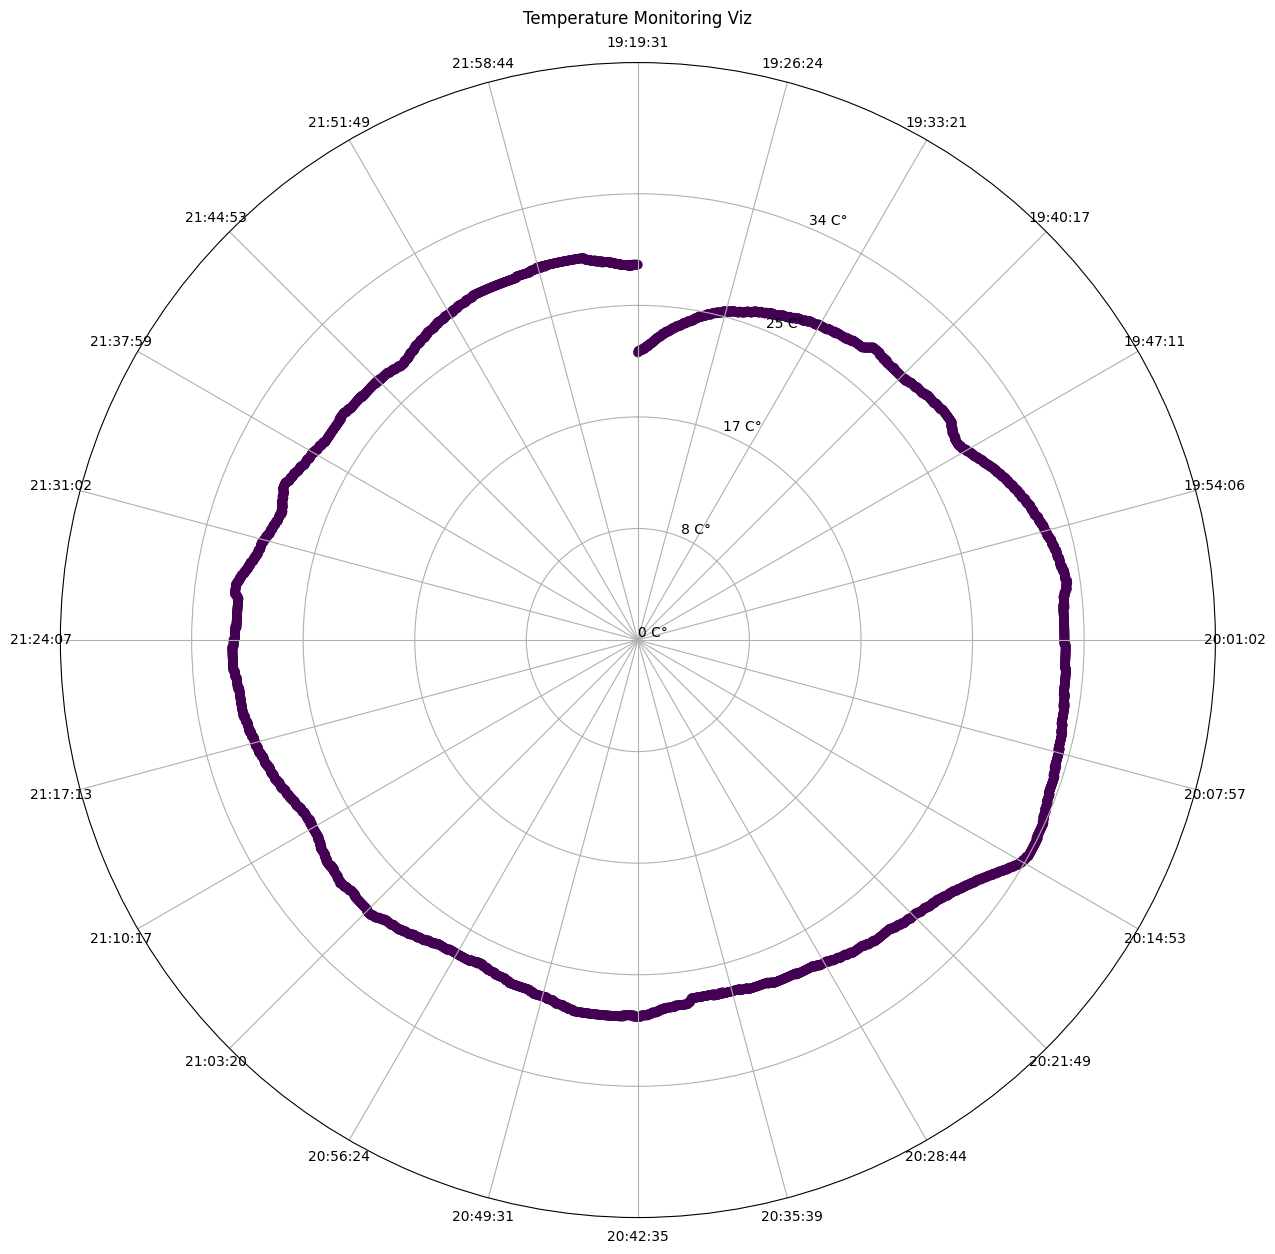

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

timestamps = [datetime.datetime.fromtimestamp(x/1000).strftime("%H:%M:%S") for x in np.array(heart_rate_data)[:,1]]
heart_rates = np.array(heart_rate_data)[:,0]


#----------------------------------------------------------------

figure, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(15, 15))

angles = np.linspace(0, 2*np.pi, len(heart_rates))
        
norm = plt.Normalize(60, 100)
colors = plt.cm.viridis(norm(heart_rates))

ax.scatter(angles, heart_rates, c=colors, alpha=0.75)

ax.set_theta_zero_location('N')  
ax.set_theta_direction(-1)  

ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(np.array(timestamps)[np.linspace(0, len(timestamps), 24, endpoint=False).astype('int')])

ax.set_ylim(0, max(heart_rates) + 10)
ax.set_yticks(np.linspace(0, max(heart_rates), 5))
ax.set_yticklabels([f"{int(i)} C°" for i in np.linspace(0, max(heart_rates), 5)])
ax.set_title('Temperature Monitoring Viz', va='bottom')
ax.grid(True)

## Interactive Visualization

In [18]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=timestamps, y=heart_rates, mode='lines+markers',
                         hoverinfo='y', marker=dict(size=5),
                         line=dict(width=1)))


fig.update_layout(
    title='24-hour Heart Rate Timeline',
    xaxis_title='Time',
    yaxis_title='Heart Rate (bpm)',
    hovermode='x',
    xaxis=dict(
        rangeslider=dict(
            visible=True,
            thickness=0.1
        ),
        type='category'
    ),
    yaxis=dict(
        fixedrange=False
    )
)

fig.show()
